# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [19]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Setup random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(RANDOM_SEED)


Using device: cuda


## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [20]:
import pandas as pd
import torch
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=RANDOM_SEED)

# Convert to a Pandas DataFrame
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Target"] = y  # Add target column

# Convert DataFrame to PyTorch tensors
X_tensor = torch.tensor(df[["Feature1", "Feature2"]].values, dtype=torch.float32)
y_tensor = torch.tensor(df["Target"].values, dtype=torch.long)

# Split into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=RANDOM_SEED, stratify=y_tensor
)

# Print shapes to confirm everything
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Display first few rows of DataFrame
print(df.head())


X_train shape: torch.Size([800, 2]), y_train shape: torch.Size([800])
X_test shape: torch.Size([200, 2]), y_test shape: torch.Size([200])
   Feature1  Feature2  Target
0 -0.051470  0.444199       1
1  1.032017 -0.419741       1
2  0.867892 -0.254827       1
3  0.288851 -0.448669       1
4 -0.833439  0.535057       0


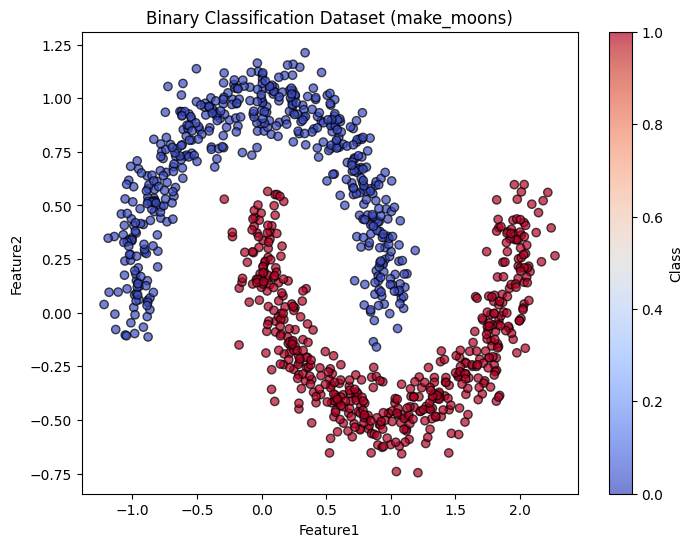

In [21]:
import matplotlib.pyplot as plt

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(df["Feature1"], df["Feature2"], c=df["Target"], cmap="coolwarm", edgecolors="k", alpha=0.7)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Binary Classification Dataset (make_moons)")
plt.colorbar(label="Class")
plt.show()


## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [22]:
import torch
from torch import nn

# Define the neural network model
class MoonModelV0(nn.Module):
    def __init__(self):
        super(MoonModelV0, self).__init__()

        # Define layers
        self.model = nn.Sequential(
            nn.Linear(2, 16),  # Input layer (2 features) → Hidden layer (16 neurons)
            nn.ReLU(),         # Activation function
            nn.Linear(16, 16), # Hidden layer (16 neurons)
            nn.ReLU(),         # Activation function
            nn.Linear(16, 1),  # Output layer (1 neuron)
            nn.Sigmoid()       # Sigmoid activation for binary classification
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the model
model = MoonModelV0()

# Print the model architecture
print(model)


MoonModelV0(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [23]:
import torch.optim as optim

# Setup loss function
loss_fn = nn.BCELoss()  # Binary Cross Entropy Loss (for Sigmoid output)

# Setup optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer with learning rate 0.01

# Print loss function and optimizer
print(loss_fn)
print(optimizer)


BCELoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [34]:
# Set model to evaluation mode
model.eval()

# Select a few test samples
sample_data = X_test[:5]

# Perform a forward pass
with torch.no_grad():
    logits = model(sample_data)  # Raw model outputs
    pred_probs = torch.sigmoid(logits)  # Convert logits to probabilities
    pred_labels = (pred_probs > 0.5).float()  # Convert probabilities to binary labels

# Print results
print("Logits:")
print(logits)

print("\nPred probs:")
print(pred_probs)

print("\nPred labels:")
print(pred_labels)


Logits:
tensor([[0.4466],
        [0.4538],
        [0.4521],
        [0.4491],
        [0.4624]])

Pred probs:
tensor([[0.6098],
        [0.6115],
        [0.6111],
        [0.6104],
        [0.6136]])

Pred labels:
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])


In [26]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip install torchmetrics
from torchmetrics import Accuracy


In [30]:
acc_fn = Accuracy(task="binary").to(device)

In [27]:
## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [39]:
# Define number of epochs
epochs = 1000

# Loop over data
for epoch in range(epochs):
    ### Training ###
    model.train()

    # 1. Forward pass
    y_logits = model(X_train)

    # 2. Calculate the loss
    y_logits = y_logits.squeeze(1)  # Remove extra dimension -> shape: [800]
    # Convert y_train to float
    y_train = y_train.float()  # Converts LongTensor to FloatTensor

   # Compute loss
    loss = loss_fn(y_logits, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing ###
    model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model(X_test)

        # 2. Calculate loss and accuracy
        test_loss = loss_fn(test_logits.squeeze(), y_test.float())
        test_acc = acc_fn(test_logits.argmax(dim=1), y_test)  # Get predictions


    # Print out every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")


Epoch 0 | Train Loss: 0.6526 | Test Loss: 0.6317 | Test Acc: 0.5000
Epoch 100 | Train Loss: 0.0811 | Test Loss: 0.0592 | Test Acc: 0.5000
Epoch 200 | Train Loss: 0.0071 | Test Loss: 0.0054 | Test Acc: 0.5000
Epoch 300 | Train Loss: 0.0026 | Test Loss: 0.0020 | Test Acc: 0.5000
Epoch 400 | Train Loss: 0.0011 | Test Loss: 0.0011 | Test Acc: 0.5000
Epoch 500 | Train Loss: 0.0007 | Test Loss: 0.0009 | Test Acc: 0.5000
Epoch 600 | Train Loss: 0.0005 | Test Loss: 0.0007 | Test Acc: 0.5000
Epoch 700 | Train Loss: 0.0004 | Test Loss: 0.0006 | Test Acc: 0.5000
Epoch 800 | Train Loss: 0.0003 | Test Loss: 0.0007 | Test Acc: 0.5000
Epoch 900 | Train Loss: 0.0003 | Test Loss: 0.0011 | Test Acc: 0.5000


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [40]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move model to the correct device


MoonModelV0(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

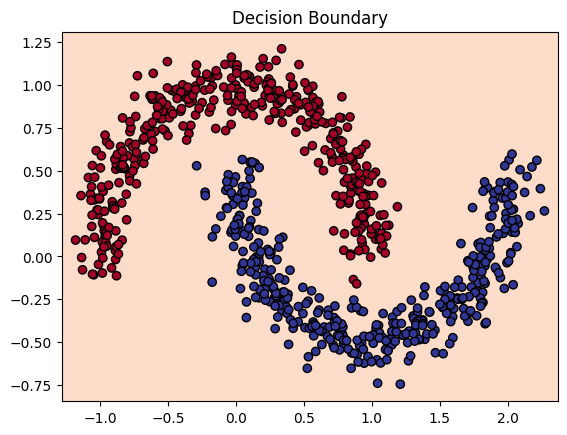

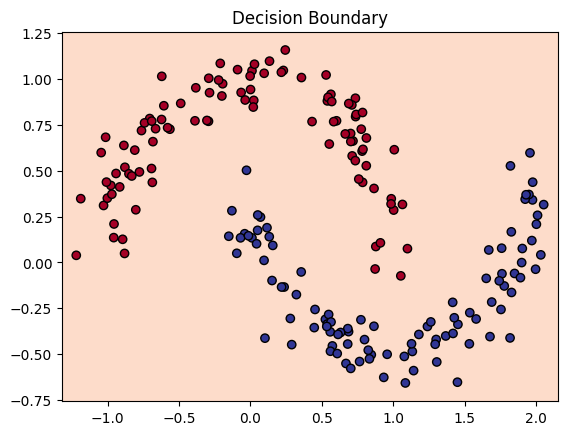

In [43]:
# Plot decision boundaries for training and test sets
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_decision_boundary(model, X, y):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        # Define the grid range
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.linspace(x_min.cpu(), x_max.cpu(), 100),
                             np.linspace(y_min.cpu(), y_max.cpu(), 100))

        # Flatten grid points and convert to tensor
        grid_points = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]).to(device)

        # Get model predictions
        logits = model(grid_points)
        preds = logits.argmax(dim=1).cpu().numpy()  # Move to CPU before converting to NumPy

        # Reshape to match meshgrid
        preds = preds.reshape(xx.shape)

        # Plot the decision boundary
        plt.contourf(xx, yy, preds, cmap=plt.cm.RdYlBu, alpha=0.3)
        plt.scatter(X[:, 0].cpu(), X[:, 1].cpu(), c=y.cpu(), cmap=plt.cm.RdYlBu, edgecolors='k')
        plt.title("Decision Boundary")
        plt.show()

# Plot decision boundaries for training data
plot_decision_boundary(model, X_train, y_train)

# Plot decision boundaries for test data
plot_decision_boundary(model, X_test, y_test)


## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

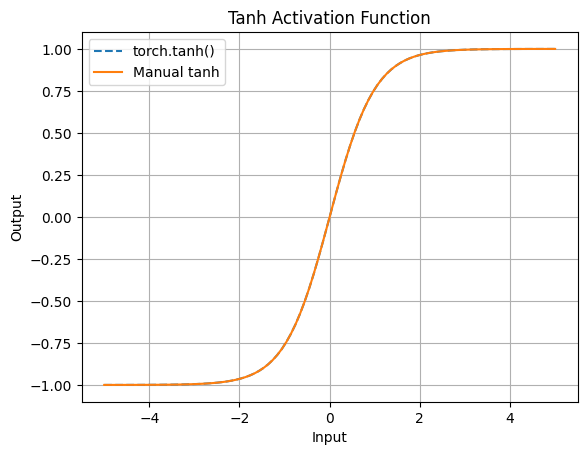

In [44]:
import torch
import matplotlib.pyplot as plt

# Create a straight line tensor
x = torch.linspace(-5, 5, 100)

# Apply torch.tanh() to the tensor
y_torch = torch.tanh(x)

# Replicate tanh function: tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))
y_manual = (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

# Plot the results
plt.plot(x.numpy(), y_torch.numpy(), label="torch.tanh()", linestyle="dashed")
plt.plot(x.numpy(), y_manual.numpy(), label="Manual tanh", linestyle="solid")
plt.legend()
plt.title("Tanh Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()


## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

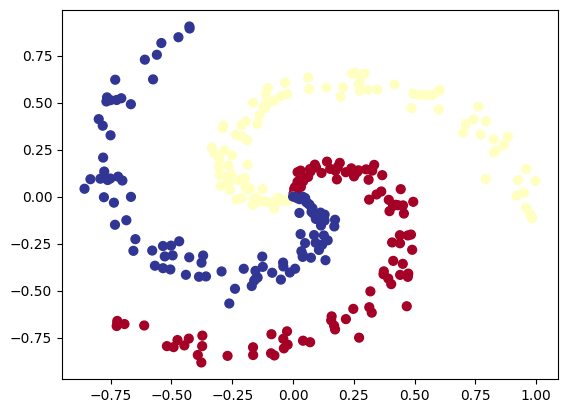

In [45]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [47]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
# Create train and test splits (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(f"Train set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test set: {X_test.shape}, Labels: {y_test.shape}")


Train set: torch.Size([240, 2]), Labels: torch.Size([240])
Test set: torch.Size([60, 2]), Labels: torch.Size([60])


In [48]:
# Let's calculuate the accuracy for when we fit our model
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [50]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
class SpiralNet(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=16, output_dim=3):
        super(SpiralNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)  # No Softmax needed (handled by CrossEntropyLoss)
        )

    def forward(self, x):
        return self.model(x)



# Instantiate model and send it to device
# Create model instance
model = SpiralNet().to(device)

# Print model summary
print(model)


SpiralNet(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=3, bias=True)
  )
)


In [52]:
# Setup data to be device agnostic
# Move data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# Print out first 10 untrained model outputs (forward pass)
# Forward pass with the first 10 examples
with torch.no_grad():  # No need to track gradients for inference
    logits = model(X_test[:10])  # Raw output (logits)
    pred_probs = torch.softmax(logits, dim=1)  # Convert to probabilities
    pred_labels = torch.argmax(pred_probs, dim=1)  # Get class predictions

# Print results
print("Logits:")
print(logits)

print("\nPred probs:")
print(pred_probs)

print("\nPred labels:")
print(pred_labels)


Logits:
tensor([[-0.2060,  0.0677,  0.1724],
        [-0.1759,  0.0645,  0.1005],
        [-0.1891,  0.0868,  0.1021],
        [-0.2061,  0.0715,  0.1684],
        [-0.2148,  0.0446,  0.1969],
        [-0.2119,  0.0500,  0.1924],
        [-0.2233,  0.0855,  0.2412],
        [-0.2026,  0.0666,  0.1645],
        [-0.2062,  0.0706,  0.1683],
        [-0.1870,  0.1014,  0.1956]], device='cuda:0')

Pred probs:
tensor([[0.2649, 0.3483, 0.3868],
        [0.2785, 0.3542, 0.3672],
        [0.2735, 0.3605, 0.3660],
        [0.2649, 0.3497, 0.3853],
        [0.2628, 0.3406, 0.3966],
        [0.2633, 0.3422, 0.3945],
        [0.2530, 0.3445, 0.4025],
        [0.2665, 0.3488, 0.3847],
        [0.2650, 0.3496, 0.3854],
        [0.2631, 0.3511, 0.3858]], device='cuda:0')

Pred labels:
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')


In [53]:
import torch.nn as nn
import torch.optim as optim

# Define loss function
loss_fn = nn.CrossEntropyLoss()

# Define optimizer (Adam recommended)
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [54]:
# Define number of epochs
epochs = 1000

# Loop over data
for epoch in range(epochs):
    ### Training ###
    model.train()

    # 1. Forward pass
    y_logits = model(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing ###
    model.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model(X_test)

        # 2. Calculate loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_logits.argmax(dim=1), y_test)  # Get predictions

    # Print out every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")


Epoch 0 | Train Loss: 1.1165 | Test Loss: 1.1148 | Test Acc: 0.3333
Epoch 100 | Train Loss: 0.3541 | Test Loss: 0.3059 | Test Acc: 0.9167
Epoch 200 | Train Loss: 0.0565 | Test Loss: 0.0260 | Test Acc: 1.0000
Epoch 300 | Train Loss: 0.0354 | Test Loss: 0.0083 | Test Acc: 1.0000
Epoch 400 | Train Loss: 0.0274 | Test Loss: 0.0035 | Test Acc: 1.0000
Epoch 500 | Train Loss: 0.0231 | Test Loss: 0.0015 | Test Acc: 1.0000
Epoch 600 | Train Loss: 0.0205 | Test Loss: 0.0007 | Test Acc: 1.0000
Epoch 700 | Train Loss: 0.0188 | Test Loss: 0.0004 | Test Acc: 1.0000
Epoch 800 | Train Loss: 0.0176 | Test Loss: 0.0002 | Test Acc: 1.0000
Epoch 900 | Train Loss: 0.0168 | Test Loss: 0.0001 | Test Acc: 1.0000


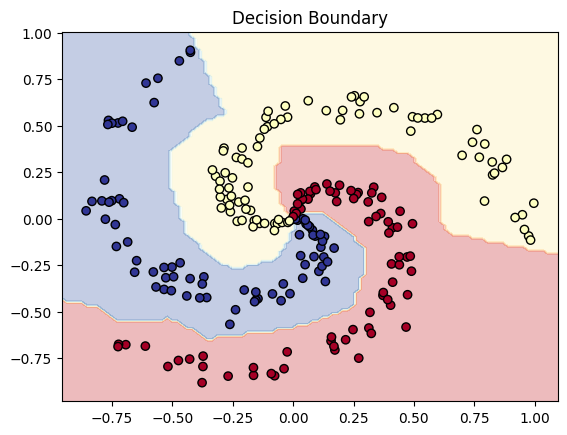

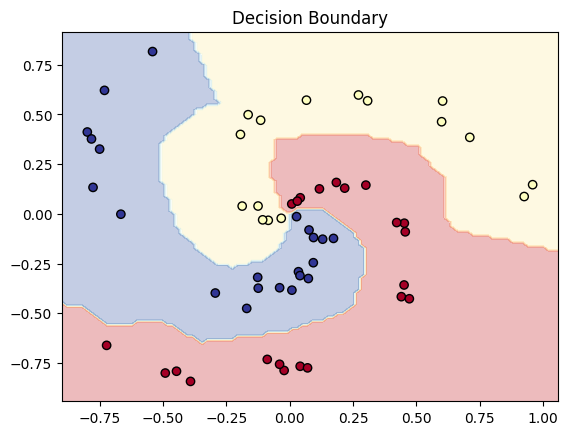

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        # Move X and y to CPU if they're on CUDA
        X, y = X.cpu(), y.cpu()

        # Define the grid range
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))

        # Flatten grid points and convert to tensor
        grid_points = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]).to(device)

        # Get model predictions
        logits = model(grid_points)
        preds = logits.argmax(dim=1).cpu().numpy()  # ✅ Move to CPU before numpy conversion

        # Reshape to match meshgrid
        preds = preds.reshape(xx.shape)

        # Plot the decision boundary
        plt.contourf(xx, yy, preds, cmap=plt.cm.RdYlBu, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')  # ✅ Ensure X and y are on CPU
        plt.title("Decision Boundary")
        plt.show()

# ✅ Move data to the same device as the model
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Plot decision boundaries for training and test data
plot_decision_boundary(model, X_train, y_train)
plot_decision_boundary(model, X_test, y_test)
